In this notebook, we will generate one image per character for a set of TTF fonts. These are:

"['arial', 'arialbd', 'arialbi', 'ariali', 'ariblk', 'calibri', 'calibrib', 'calibrii', 'calibril', 'calibrili', 'calibriz', 'cambriab', 'cambriai', 'cambriaz', 'candara', 'Candarab', 'candarai', 'candaraz', 'cmb10', 'cmmi10', 'cmr10', 'cmss10', 'cmtt10', 'comic', 'comicbd', 'comici', 'comicz', 'consola', 'consolab', 'consolai', 'consolaz', 'constan', 'constanb', 'constani', 'constanz', 'corbel', 'corbelb', 'corbeli', 'corbelz', 'cour', 'courbd', 'courbi', 'couri', 'ebrima', 'ebrimabd', 'framd', 'framdit', 'Gabriola', 'gadugi', 'gadugib', 'georgia', 'georgiab', 'georgiai', 'georgiaz', 'guitar pro 5', 'himalaya', 'impact', 'javatext', 'LeelaUIb', 'LeelawUI', 'LeelUIsl', 'lucon', 'l_10646', 'malgun', 'malgunbd', 'malgunsl', 'micross', 'mmrtext', 'mmrtextb', 'monbaiti', 'msyi', 'mvboli', 'Nirmala', 'nirmalab', 'NirmalaS', 'ntailu', 'ntailub', 'pala', 'palab', 'palabi', 'palai', 'phagspa', 'phagspab', 'powertab', 'segoepr', 'segoeprb', 'segoesc', 'segoescb', 'segoeui', 'segoeuib', 'segoeuii', 'segoeuil', 'segoeuisl', 'segoeuiz', 'seguibl', 'seguibli', 'seguiemj', 'seguihis', 'seguili', 'seguisb', 'seguisbi', 'seguisli', 'seguisym', 'simsunb', 'STIXGeneral', 'STIXGeneralBol', 'STIXGeneralBolIta', 'STIXGeneralItalic', 'sylfaen', 'tahoma', 'tahomabd', 'taile', 'taileb', 'times', 'timesbd', 'timesbi', 'timesi', 'trebuc', 'trebucbd', 'trebucbi', 'trebucit', 'Vera', 'VeraBd', 'VeraBI', 'VeraIt', 'VeraMoBd', 'VeraMoBI', 'VeraMoIt', 'VeraMono', 'VeraSe', 'VeraSeBd', 'verdana', 'verdanab', 'verdanai', 'verdanaz', 'VodafoneExBd', 'vodafonelt', 'vodafonerg', 'VodafoneRgBd']"

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from matplotlib import font_manager

In [4]:
font_files = font_manager.fontManager.ttflist

font_files[0].fname

'D:\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneral.ttf'

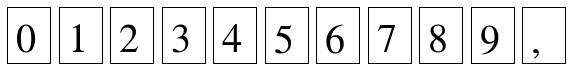

In [5]:
font_props = font_manager.FontProperties(style='normal', size=40, fname=font_files[0].fname)
text = '0123456789,'

figure, axes = pylab.subplots(1, len(text), figsize=(10, 1))

for char, ax in zip(text, axes):
    ax.text(0.2, 0.7, char, verticalalignment='top', horizontalalignment='left', fontproperties=font_props)
    ax.tick_params(
        axis='both',          # changes apply to the x-axis and y-axis
        which='both',      # both major and minor ticks are affected
        bottom='off', top='off', left='off', right='off', # don't display ticks
        labelbottom='off', labeltop='off', labelleft='off', labelright='off' # don't display ticklabels
) 
    
    

In [9]:
import os
image_dir = os.path.join(os.getcwd(), 'font_images')
os.makedirs(image_dir, exist_ok=True)

def save_image(font, font_size=40, figsize=(11, 1)):
    """
    Save the horizonatally stacked list of digits image for a given font into an image (font_name.png).
    
    matplotlib does not deal with pixels. Instead we supply the 'dots per inch' arg. 
    Saved image size in pixels is figsize * dpi.
    """
    font_props = font_manager.FontProperties(style='normal', size=font_size, fname=font.fname)
    image_name = os.path.join(image_dir, 
                              os.path.basename(font.fname).replace('.ttf', '.png'))
    
    text = '0123456789,'

    figure, axes = pylab.subplots(1, len(text), figsize=figsize)

    for char, ax in zip(text, axes):
        ax.text(0.2, 0.7, char, verticalalignment='top', horizontalalignment='left', fontproperties=font_props)
        ax.axis('off')

    # bbox_inches='tight' removes leading and trailing whitespace.
    pylab.savefig(image_name, bbox_inches='tight', dpi=100)    
    pylab.close(figure) 

In [10]:
from ipywidgets import FloatProgress
from IPython.display import display

In [11]:
prog = FloatProgress(min=1, max=len(font_files), description='saving font images...')
display(prog)

for font in font_files:
    if font.fname.endswith('.ttf'):
        save_image(font)
        
    prog.value += 1
    
prog.bar_style = 'success'